什么是embedding?

1. 从数学上看, 是映射
2. 从神经⽹络的⾓度看, 是层与层之间的矩阵
3. 从特征的⾓度看, 是从⼀套特征映射到另⼀种表⽰⽅式

本节课, 我们从非监督学习和监督学习两个角度, 来讨论embedding的使用.

## Gensim

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
# Create a new column for Make Model
df['Maker_Model']= df['Make']+ " " + df['Model']

# Select features from original dataset to form a new dataframe 
df1 = df[['Engine Fuel Type','Transmission Type','Driven_Wheels','Market Category','Vehicle Size', 'Vehicle Style', 'Maker_Model']]
# For each row, combine all the columns into one column
df2 = df1.apply(lambda x: ','.join(x.astype(str)), axis=1)
# Store them in a pandas dataframe
df_clean = pd.DataFrame({'clean': df2})
# Create the list of list format of the custom corpus for gensim modeling 
sent = [row.split(',') for row in df_clean['clean']]
# show the example of list of list format of the custom corpus for gensim modeling 
sent[:2]

[['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Factory Tuner',
  'Luxury',
  'High-Performance',
  'Compact',
  'Coupe',
  'BMW 1 Series M'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Performance',
  'Compact',
  'Convertible',
  'BMW 1 Series']]

In [4]:
len(sent)

11914

In [5]:
from gensim.models import Word2Vec
model = Word2Vec(sent, min_count=1,size= 50,workers=3, window =3, sg = 1)

In [6]:
model.wv['MANUAL']

array([-0.09335728, -0.5820901 ,  0.56280243,  0.14411293, -0.28651264,
        0.2338425 , -0.10680396,  0.00788517,  0.32259434,  0.4617409 ,
       -0.31043804, -0.66639256, -0.48758674, -0.44869497,  0.17258894,
        0.02315243,  0.23150876, -0.3339218 ,  0.35806808, -0.09559384,
       -0.5494049 , -0.09066434, -0.47239697, -0.35499066,  0.45405537,
        0.32984814, -0.30953053,  0.25979558, -0.38220242,  0.50392973,
       -0.2907772 ,  0.14723594, -0.27788657,  0.2798916 ,  0.45414498,
        0.05864007,  0.1751874 , -0.46399263,  0.18750954, -0.2925976 ,
       -0.08701868, -0.1755035 ,  0.00606409,  0.3500011 , -0.06174557,
       -0.03262527, -0.13297725, -0.16642791,  0.29017037, -0.32028264],
      dtype=float32)

In [7]:
model.wv.similarity('Porsche 718 Cayman', 'Nissan Van')

0.89165175

In [8]:
model.wv.similarity('Porsche 718 Cayman', 'Mercedes-Benz SLK-Class')

0.9506965

In [9]:
model.wv.most_similar('Mercedes-Benz SLK-Class')[:5]

[('Mercedes-Benz SL-Class', 0.9955549240112305),
 ('Lotus Exige', 0.9949293732643127),
 ('Lotus Elise', 0.9948575496673584),
 ('BMW M6', 0.9942445158958435),
 ('Mercedes-Benz CLK-Class', 0.9940283298492432)]

In [10]:


def display_closestwords_tsnescatterplot(model, word, size):
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]
    close_words = model.wv.similar_by_word(word)
    arr = np.append(arr, np.array([model.wv[word]]), axis=0)

    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
        plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
        plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


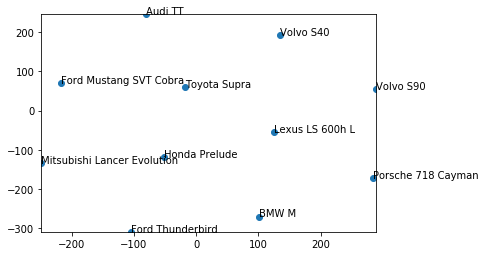

In [11]:
display_closestwords_tsnescatterplot(model, 'Porsche 718 Cayman', 50) 

In [12]:
model.train([["hello", "world"]], total_examples=1, epochs=1)

(0, 2)

## Tensorflow

In [13]:
input_array = np.random.randint(1000, size=(32, 10))

In [14]:
input_array.shape

(32, 10)

In [20]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [22]:
# from tf.keras.model import Sequential
# from tf.keras.layers import Embedding

model = keras.models.Sequential()
model.add(keras.layers.Embedding(1000, 64, input_length=10))
# the model will take as input an integer matrix of size (batch,
# input_length).
# the largest integer (i.e. word index) in the input should be no larger
# than 999 (vocabulary size).
# now model.output_shape == (None, 10, 64), where None is the batch
# dimension.

input_array = np.random.randint(1000, size=(32, 10))

model.compile('rmsprop', 'mse')
output_array = model.predict(input_array)
assert output_array.shape == (32, 10, 64)

## Embedding Lookup     

In [42]:
with tf.Session() as sess:
    c = np.random.random([10, 1])
    b = tf.nn.embedding_lookup(c, [0,1,2,3])
    print(c)
    print(sess.run(b))

[[0.28402207]
 [0.20263002]
 [0.70648039]
 [0.15327527]
 [0.85561039]
 [0.08571971]
 [0.98462245]
 [0.5157945 ]
 [0.350344  ]
 [0.44278432]]
[[0.28402207]
 [0.20263002]
 [0.70648039]
 [0.15327527]]
